In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('loop_diff.csv', index_col='Unnamed: 0')

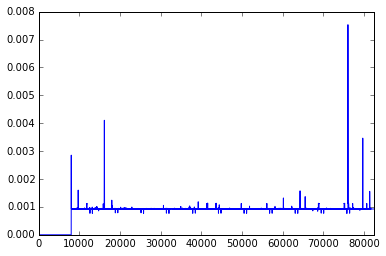

In [3]:
df['delta:sys_enter_io_getevents__sys_exit_io_submit'].plot()

                                                         Max      Mean  Min
delta:sys_exit_ppoll__kvm_exit                      0.356655  0.000431    0
delta:sys_enter_io_submit__sys_exit_ppoll           0.012350  0.000458    0
delta:sys_exit_io_submit__sys_enter_io_submit       0.000332  0.000007    0
delta:sys_enter_io_getevents__sys_exit_io_submit    0.007530  0.000844    0
delta:sys_exit_io_getevents__sys_enter_io_getev...  0.000015  0.000002    0
delta:kvm_entry__sys_exit_io_getevents              0.315316  0.002928    0


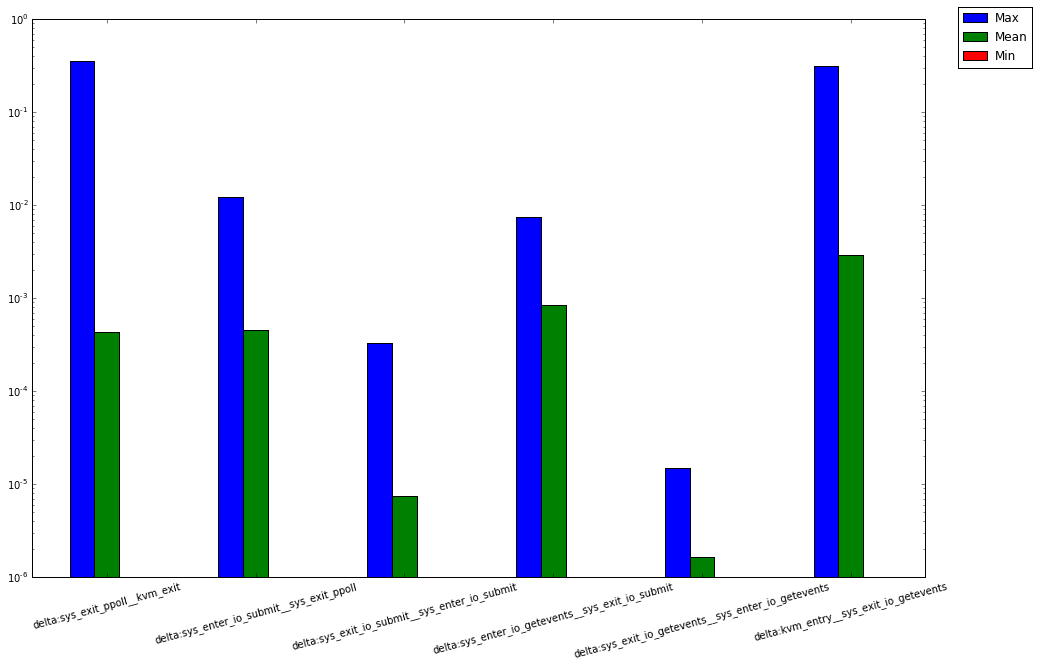

In [4]:
deltas = [i for i in df.keys() if 'delta' in i] 

# for delta in deltas:
#     print("%s -- mean: %f -- max: %f -- min: %f" %(delta, df[delta].mean(), df[delta].max(), df[delta].min()))
df_stat = pd.DataFrame([df[deltas].max().values, df[deltas].mean().values, df[deltas].min().values]).T
df_stat.columns = ['Max', 'Mean', 'Min']
df_stat.index = deltas

print(df_stat)

ax = df_stat.plot(kind='bar', log=True, rot=15, figsize=(16,10))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=-1)
# ax.text(1, 2, df_stat.T, style='italic',
#         bbox={'facecolor':'yellow', 'alpha':0.5, 'pad':20})
fig = ax.get_figure()
fig.savefig('asdf.png',figsize=(18,20))